In [2]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 27.6 MB/s eta 0:00:00


In [3]:
#!pip install unidecode

In [4]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

device = "cuda"
model_id = "gpt2-large"
model = GPT2LMHeadModel.from_pretrained(model_id).to(device)
tokenizer = GPT2TokenizerFast.from_pretrained(model_id)


In [5]:
#!pip install aspose.words

In [6]:
#!pip install unidecode

In [7]:
# Only run once 

# import aspose.words as aw

# fileNames = [ "Hungarian Bible.rtf", "Gothic Bible.rtf","Basque Bible.rtf", "Swahili Bible.rtf"]

# output = aw.Document()
# # Remove all content from the destination document before appending.
# output.remove_all_children()

# for fileName in fileNames:
#     input = aw.Document(fileName)
#     input.save(fileName[:-4]+".txt");
    
#     # Append the source document to the end of the destination document.
#     #output.append_document(input, aw.ImportFormatMode.KEEP_SOURCE_FORMATTING)

# #output.save("Output.txt");

In [8]:
#from unidecode import unidecode

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%cd /content/drive/My Drive/Colab Notebooks/Linguistics

/content/drive/My Drive/Colab Notebooks/Linguistics


In [11]:
import pandas as pd
import numpy as np

import re 
import tqdm
import copy

import torch
from tqdm import tqdm
import os

In [12]:
lst_file_name = os.listdir('clean_outputs')

In [13]:
lst_file_name

['GUL',
 'BZJ',
 'JNT',
 'KJV',
 'SIPB',
 'PCM',
 'NRSV',
 'SCO1904',
 'SWZZB1921',
 'HPB',
 'USNT']

In [14]:
text_dict = {}
for each_txt in lst_file_name:
  df = pd.read_csv('clean_outputs/'+each_txt+'/'+each_txt+'_sentences_clean.csv')
  text_dict[each_txt] = df[['text']]

In [15]:
# def remove_symbol(str_lst):
#     '''remove none alphabets or punctuations or diacritical marks/accents from paragraphs'''
#     new_lst = []
#     for string in str_lst:
#       output = unidecode(string)
#       string  = re.sub("[^A-Za-z]", " ",output)
#       string = " ".join(string.split())
#       new_lst.append(string.lower())
#     return new_lst

In [16]:
# pidg = remove_symbol(pidg)
# en = remove_symbol(en)
# hunga = remove_symbol(hunga)
# goth = remove_symbol(goth)
# basq = remove_symbol(basq)
# swahi = remove_symbol(swahi)
# turk = remove_symbol(turk)

In [17]:
max_length = model.config.n_positions

def find_ppl_model(encoding_part, seq_len_val, stride_val):
  '''
  we can simply pass the input_ids as the labels to our model, 
  and the average negative log-likelihood for each token is 
  returned as the loss.
  '''
  nlls = []
  prev_end_loc = 0

  for begin_loc in tqdm(range(0, seq_len_val, stride_val)):
    end_loc = min(begin_loc + max_length, seq_len_val)
    trg_len = end_loc - prev_end_loc  # may be different from stride on last loop
    input_ids = encoding_part.input_ids[:, begin_loc:end_loc].to(device)
    target_ids = input_ids.clone()
    target_ids[:, :-trg_len] = -100

    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)

        # loss is calculated using CrossEntropyLoss which averages over input tokens.
        # Multiply it with trg_len to get the summation instead of average.
        # We will take average over all the tokens to get the true average
        # in the last step of this example.
        neg_log_likelihood = outputs.loss * trg_len

    nlls.append(neg_log_likelihood)

    prev_end_loc = end_loc
    if end_loc == seq_len:
        break

    ppl = torch.exp(torch.stack(nlls).sum() / end_loc)
    return ppl

In [18]:
ppl_lst = []

# **PPL on Gullah**


> Stride = 512



In [43]:
test = copy.deepcopy(text_dict['GUL'])

In [44]:
encodings = tokenizer("\n\n".join(test['text']), return_tensors="pt")

In [45]:
encodings

{'input_ids': tensor([[ 6381,   331,   993,  ..., 12012,  5770,   661]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]])}

In [46]:
stride = 512
seq_len = encodings.input_ids.size(1)


In [47]:
ppl = find_ppl_model(encodings, seq_len, stride)
ppl_lst.append(ppl)
ppl

  0%|          | 0/747 [00:00<?, ?it/s]


tensor(18.2820, device='cuda:0')

## **PPL in Belize**

> Stride = 512



In [24]:
test = copy.deepcopy(text_dict['BZJ'])

In [25]:
encodings = tokenizer("\n\n".join(test['text']), return_tensors="pt")

In [26]:
seq_len = encodings.input_ids.size(1)

ppl = find_ppl_model(encodings, seq_len, stride)
ppl_lst.append(ppl)
ppl

  0%|          | 0/873 [00:00<?, ?it/s]


tensor(58.4039, device='cuda:0')

## **PPL in Jamaican Creole**

> Stride = 512



In [27]:
test = copy.deepcopy(text_dict['JNT'])
encodings = tokenizer("\n\n".join(test['text']), return_tensors="pt")
seq_len = encodings.input_ids.size(1)

ppl = find_ppl_model(encodings, seq_len, stride)
ppl_lst.append(ppl)
ppl


  0%|          | 0/817 [00:00<?, ?it/s]


tensor(42.9403, device='cuda:0')

## **PPL in King James**

> Stride = 512



In [28]:
test = copy.deepcopy(text_dict['KJV'])
encodings = tokenizer("\n\n".join(test['text']), return_tensors="pt")
seq_len = encodings.input_ids.size(1)

ppl = find_ppl_model(encodings, seq_len, stride)
ppl_lst.append(ppl)
ppl

  0%|          | 0/415 [00:00<?, ?it/s]


tensor(6.1178, device='cuda:0')

## **PPL in Solomon Islands**

> Stride = 512



In [29]:
test = copy.deepcopy(text_dict['SIPB'])
encodings = tokenizer("\n\n".join(test['text']), return_tensors="pt")
seq_len = encodings.input_ids.size(1)

ppl = find_ppl_model(encodings, seq_len, stride)
ppl_lst.append(ppl)
ppl

  0%|          | 0/1075 [00:00<?, ?it/s]


tensor(16.2102, device='cuda:0')

## **PPL in Nigerian**

> Stride = 512



In [30]:
test = copy.deepcopy(text_dict['PCM'])
encodings = tokenizer("\n\n".join(test['text']), return_tensors="pt")
seq_len = encodings.input_ids.size(1)

ppl = find_ppl_model(encodings, seq_len, stride)
ppl_lst.append(ppl)
ppl

  0%|          | 0/553 [00:00<?, ?it/s]


tensor(48.8644, device='cuda:0')

## **PPL in English**

> Stride = 512



In [31]:
test = copy.deepcopy(text_dict['NRSV'])
encodings = tokenizer("\n\n".join(test['text']), return_tensors="pt")
seq_len = encodings.input_ids.size(1)

ppl = find_ppl_model(encodings, seq_len, stride)
ppl_lst.append(ppl)
ppl

  0%|          | 0/397 [00:00<?, ?it/s]


tensor(5.7847, device='cuda:0')

## **PPL in Scots**

> Stride = 512

In [32]:
test = copy.deepcopy(text_dict['SCO1904'])
encodings = tokenizer("\n\n".join(test['text']), return_tensors="pt")
seq_len = encodings.input_ids.size(1)

ppl = find_ppl_model(encodings, seq_len, stride)
ppl_lst.append(ppl)
ppl

  0%|          | 0/507 [00:00<?, ?it/s]


tensor(32.4171, device='cuda:0')

## **PPL in Ulster Scots**

> Stride = 512

In [33]:
test = copy.deepcopy(text_dict['USNT'])
encodings = tokenizer("\n\n".join(test['text']), return_tensors="pt")
seq_len = encodings.input_ids.size(1)

ppl = find_ppl_model(encodings, seq_len, stride)
ppl_lst.append(ppl)
ppl

  0%|          | 0/298 [00:00<?, ?it/s]


tensor(21.1469, device='cuda:0')

## **PPL in Hawaiian**

> Stride = 512

In [34]:
test = copy.deepcopy(text_dict['HPB'])
encodings = tokenizer("\n\n".join(test['text']), return_tensors="pt")
seq_len = encodings.input_ids.size(1)

ppl = find_ppl_model(encodings, seq_len, stride)
ppl_lst.append(ppl)
ppl

  0%|          | 0/717 [00:00<?, ?it/s]


tensor(42.7473, device='cuda:0')

## **PPL in Swahili (Zanzibar)**

> Stride = 512

In [35]:
test = copy.deepcopy(text_dict['SWZZB1921'])
encodings = tokenizer("\n\n".join(test['text']), return_tensors="pt")
seq_len = encodings.input_ids.size(1)

ppl = find_ppl_model(encodings, seq_len, stride)
ppl_lst.append(ppl)
ppl

  0%|          | 0/657 [00:00<?, ?it/s]


tensor(39.8382, device='cuda:0')

#Summary

In [36]:
id_bag = {'SCO1904':'Scots','JNT':'Jamaican Creole',
          'PCM':'Nigerian','GUL':'Gullah', 'USNT':'Ulster Scots',
          'SIPB':'Solomon Islands','BZJ':'Belize','HPB':'Hawaiian',
          'NRSV': 'English','KJV':'King James',
          'SWZZB1921':'Swahili(Zanzibar)'}

In [37]:
ppl_lst = [a.item() for a in ppl_lst]

In [38]:
table = pd.DataFrame({"Language": [id_bag[name] for name in lst_file_name], 
                      "Perplexity Score": ppl_lst})

In [39]:
table.sort_values(by = ['Perplexity Score'],ignore_index=True,inplace=True)

In [40]:
table

,Language,Perplexity Score
0,English,5.784701
1,King James,6.117774
2,Solomon Islands,16.210180
3,Gullah,18.281952
4,Swahili(Zanzibar),21.146902
5,Scots,32.417068
6,Ulster Scots,39.838173
7,Hawaiian,42.747349
8,Jamaican Creole,42.940308
9,Nigerian,48.864384


In [41]:
import seaborn as sns
import matplotlib.pylab as plt

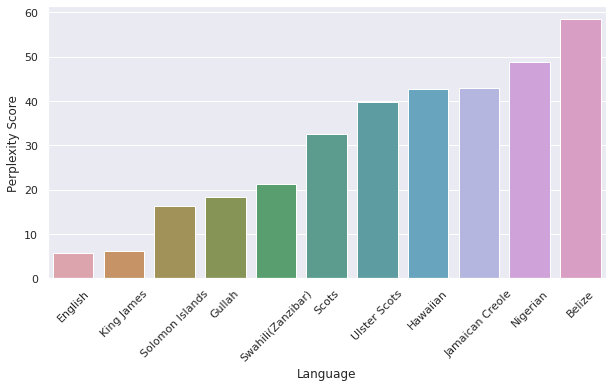

In [42]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=table, x="Language", y="Perplexity Score",saturation=0.5)
plt.xticks(rotation=45)
plt.savefig('score_output.png');